In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('tip.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Графіки в Matplotlib

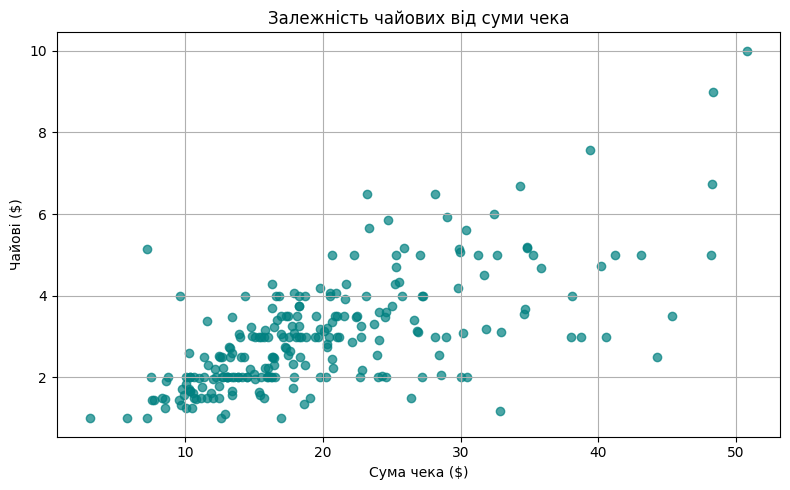

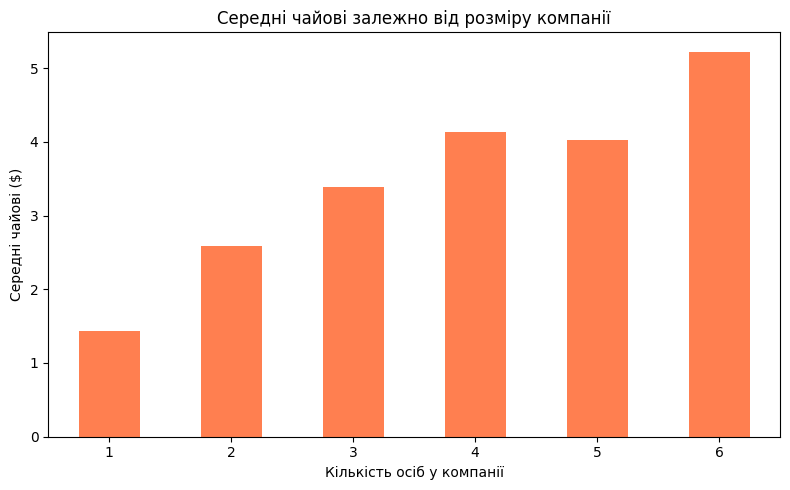

In [4]:
import matplotlib.pyplot as plt

# --- Графік 1: Загальна сума рахунку vs Чайові ---
plt.figure(figsize=(8, 5))
plt.scatter(df['total_bill'], df['tip'], alpha=0.7, color='teal')
plt.title('Залежність чайових від суми чека')
plt.xlabel('Сума чека ($)')
plt.ylabel('Чайові ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Графік 2: Середні чайові за розміром компанії ---
avg_tips_by_size = df.groupby('size')['tip'].mean()
plt.figure(figsize=(8, 5))
avg_tips_by_size.plot(kind='bar', color='coral')
plt.title('Середні чайові залежно від розміру компанії')
plt.xlabel('Кількість осіб у компанії')
plt.ylabel('Середні чайові ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Компонування графіків у "дашборд" з Matplotlib

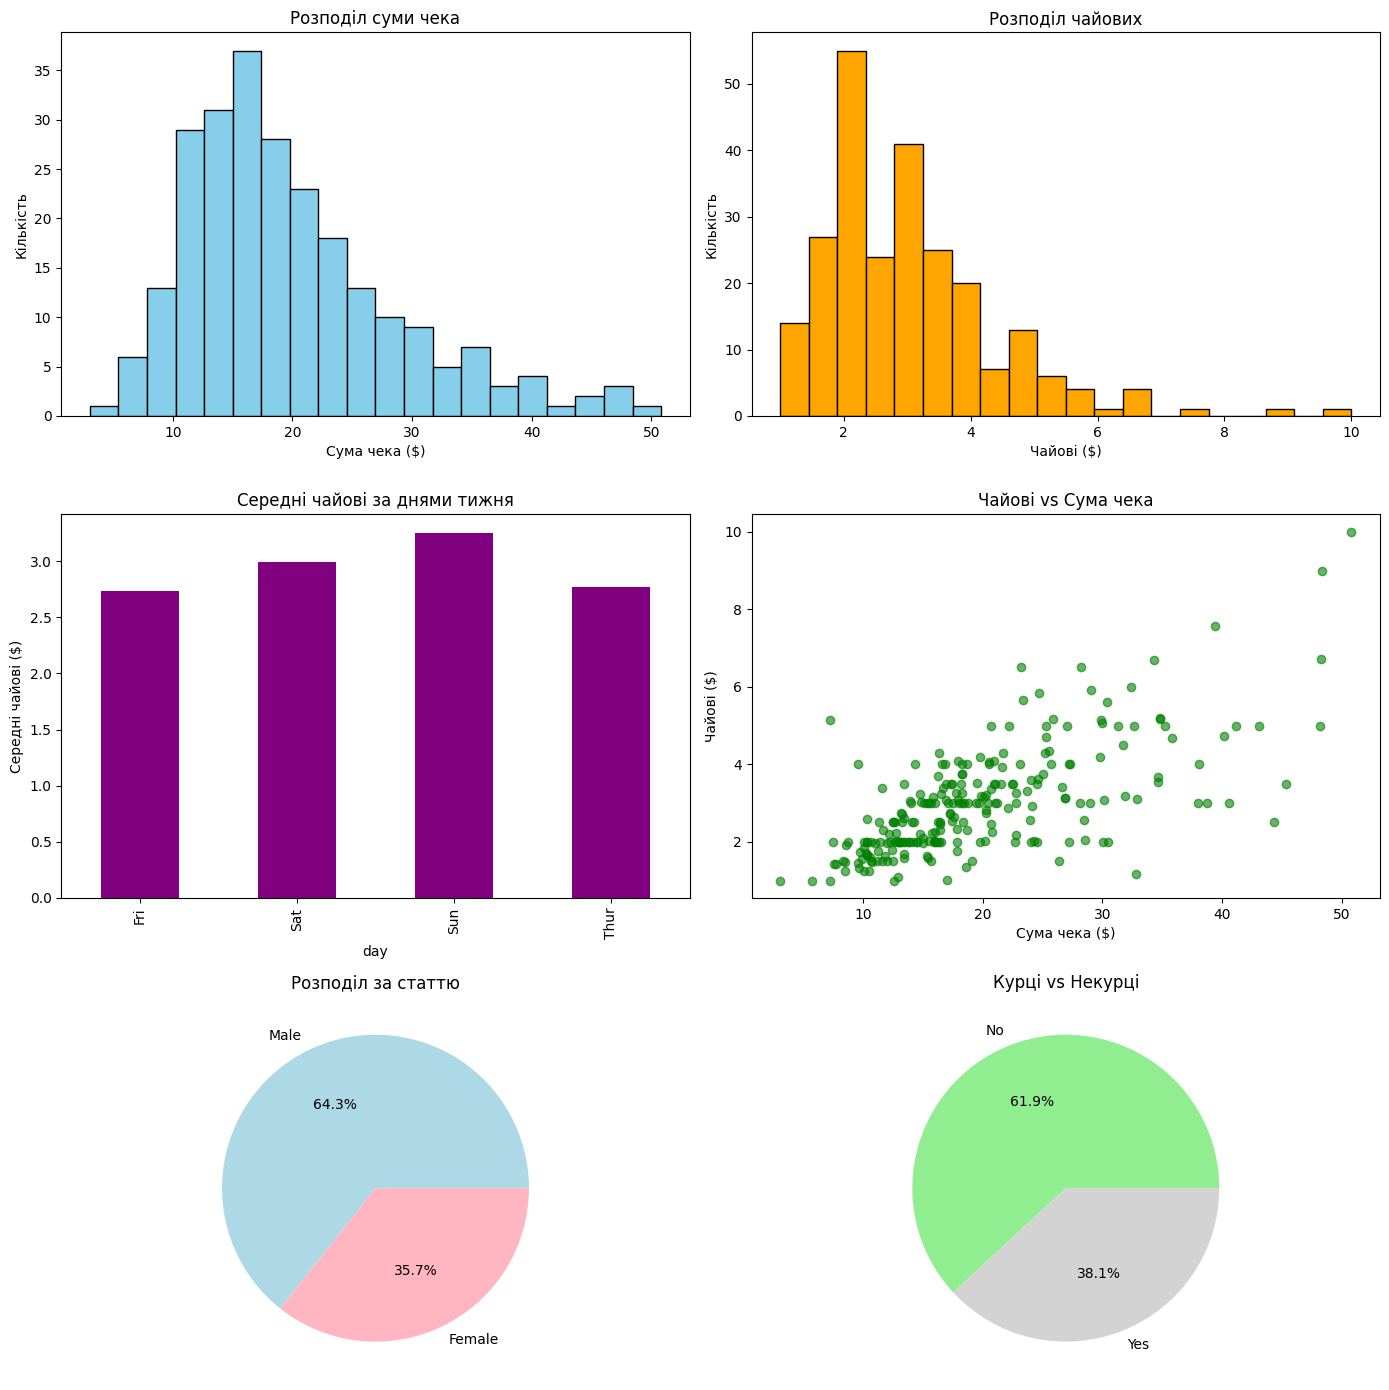

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(14, 14))

# Графік 1: Розподіл суми чека
axs[0, 0].hist(df['total_bill'], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Розподіл суми чека')
axs[0, 0].set_xlabel('Сума чека ($)')
axs[0, 0].set_ylabel('Кількість')

# Графік 2: Розподіл чайових
axs[0, 1].hist(df['tip'], bins=20, color='orange', edgecolor='black')
axs[0, 1].set_title('Розподіл чайових')
axs[0, 1].set_xlabel('Чайові ($)')
axs[0, 1].set_ylabel('Кількість')

# Графік 3: Середні чайові за днями
df.groupby('day')['tip'].mean().plot(kind='bar', ax=axs[1, 0], color='purple')
axs[1, 0].set_title('Середні чайові за днями тижня')
axs[1, 0].set_ylabel('Середні чайові ($)')

# Графік 4: Scatter загальний рахунок vs чайові
axs[1, 1].scatter(df['total_bill'], df['tip'], alpha=0.6, color='green')
axs[1, 1].set_title('Чайові vs Сума чека')
axs[1, 1].set_xlabel('Сума чека ($)')
axs[1, 1].set_ylabel('Чайові ($)')

# Графік 5: Кругова діаграма статі
sex_counts = df['sex'].value_counts()
axs[2, 0].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightpink'])
axs[2, 0].set_title('Розподіл за статтю')

# Графік 6: Кругова діаграма курців
smoker_counts = df['smoker'].value_counts()
axs[2, 1].pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightgray'])
axs[2, 1].set_title('Курці vs Некурці')

plt.tight_layout()
plt.show()


# Просунуті візуалізації у Seaborn

C:\Users\Stanislav\AppData\Local\Temp\ipykernel_6528\78446243.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sex', y='tip', palette='Set2')


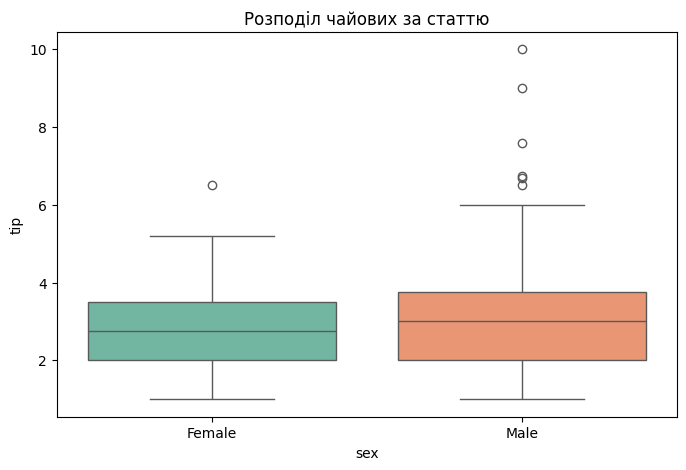

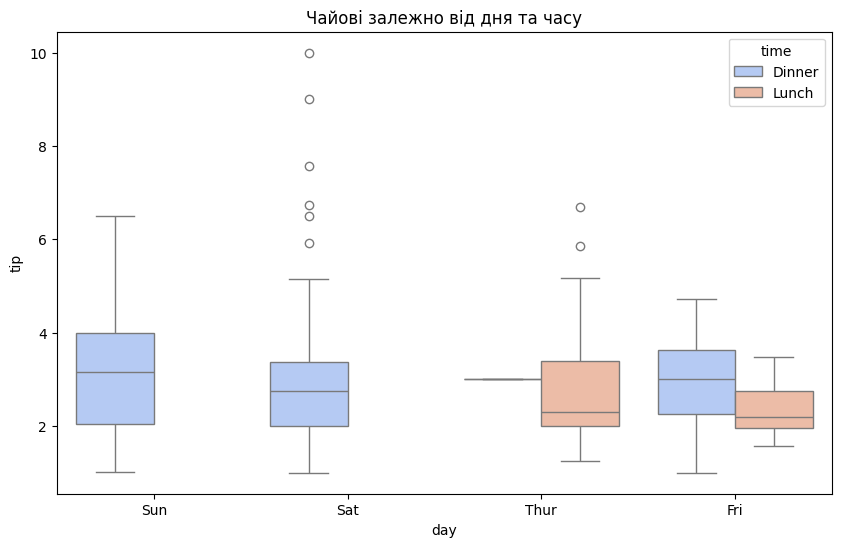

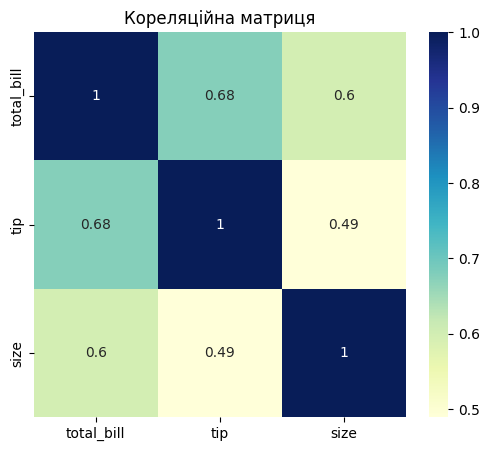

In [7]:
import seaborn as sns

# --- Графік 1: Розподіл чайових по статі ---
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='sex', y='tip', palette='Set2')
plt.title('Розподіл чайових за статтю')
plt.show()

# --- Графік 3: Чайові відносно дня та часу ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='day', y='tip', hue='time', palette='coolwarm')
plt.title('Чайові залежно від дня та часу')
plt.show()

# --- Графік 4: Кореляційна матриця ---
plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title('Кореляційна матриця')
plt.show()
